# HW Assignment 5

Data Visualization is done based on the data available at :
 http://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml#team_schedule::none

This assignment is giving a detailed overview on how to perform data visualization using few examples of the powerful Seaborn module in Python.

To install Seaborn type "pip install seaborn" or "conda install seaborn" in the terminal window.

The following are a few main plot types covered in this notebook:

1. factorplot
2. lmplot
3. swarmplot
4. countplot


In [320]:
import os  
#Importing os module in python provides a way of using system depended functionality.

import numpy as np 
#Numpy is the core library for scientific computing in Python. np is an alias pointing to numpy

import pandas as pd 
#Pandas is widely used Python library in data science mainly used for data munging.

import seaborn as sns 
#Seaborn is a Python visualization library based on matplotlib providing a high-level interface for drawing attractive statistical graphics.

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)): 
#int() method takes 2 arguments (No of string to be converted , base)
    import prep # noqa 
#Lines that contain a "noqa" comment at the end will not issue warnings.

pd.options.display.max_rows = 10 
#pandas has an options system that lets us customize some aspects of its behaviour.
#display-related option here max_rows set the max number of rows that will be displayed to 10.

sns.set(style='ticks', context='talk')
#sns.set_style("ticks") by default sets the ticks up to face outwards on the axes in graphs
#sns.set_context() affects things like the size of the labels, lines etc.For 'talk' by default the font scale is 1.3

In [321]:
#Importing the file from machine and saving it as .csv 

fp = 'C:/Vaibhavi/IDS/NBA_data_2016.csv'
games = pd.read_csv(fp)
games.head(20)
#head(): displays the top rows of the data, in this case top 20

,Gm#,Date,Tm,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,1,"Tuesday, Apr 5,2016",BOS,CLE,W,6,2,NaN,Jan-00,1,Tied,Price,Kluber,NaN,3:13,D,34493,+
1,2,"Wednesday, Apr 6,2016",BOS,CLE,L,6,7,NaN,1-Jan,2,1,McAllister,Tazawa,Allen,3:29,N,10298,-
2,3,"Friday, Apr 8,2016",BOS,TOR,W,8,7,NaN,1-Feb,2,1.5,Barnes,Storen,Kimbrel,3:24,N,48871,+
3,4,"Saturday, Apr 9,2016",BOS,TOR,W,8,4,NaN,1-Mar,2,1,Porcello,Dickey,NaN,2:48,D,47138,++
4,5,"Sunday, Apr 10,2016",BOS,TOR,L,0,3,NaN,2-Mar,2,2,Estrada,Wright,Osuna,2:27,D,46158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,"Friday, Apr 22,2016",BOS,HOU,W,6,2,NaN,8-Aug,2,2.5,Wright,McHugh,Kimbrel,3:28,N,26672,+
16,17,"Saturday, Apr 23,2016",BOS,HOU,L,3,8,NaN,9-Aug,2,3.5,Fiers,Buchholz,NaN,3:28,D,40232,-
17,18,"Sunday, Apr 24,2016",BOS,HOU,W,7,5,12.0,9-Sep,2,2.5,Hembree,Giles,NaN,5:03,N,32416,+
18,19,"Monday, Apr 25,2016",BOS,ATL,W,1,0,NaN,9-Oct,2,1.5,Porcello,Teheran,Kimbrel,2:55,N,22735,++


## The following are the graphs plotted on the given data :

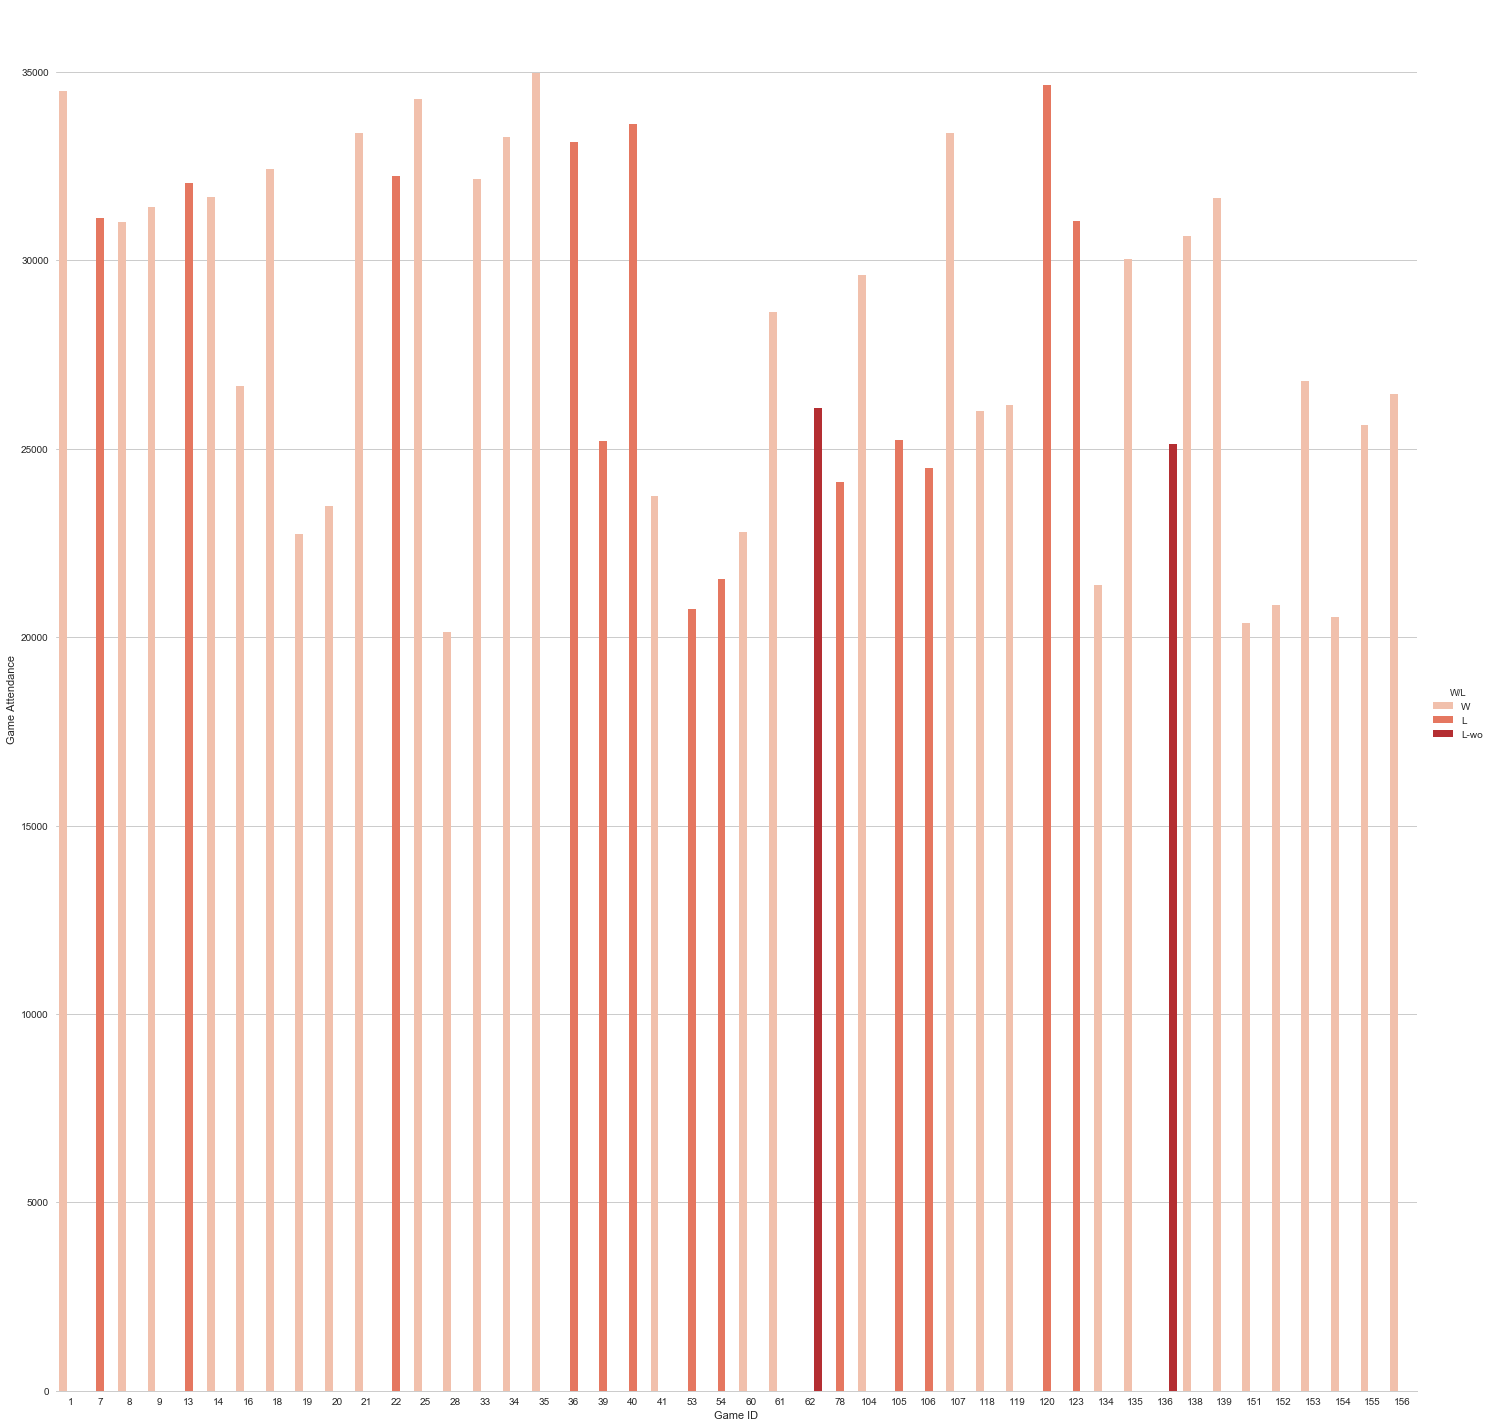

In [324]:
import seaborn as sns
sns.set(style="whitegrid")
#Using the the function set , the background is set to white

#factorplot():The default plot that is shown is a point plot, but other seaborn categorical plots can be chosen with the kind parameter, including box plots, violin plots, bar plots, or strip plots.

#Drawing a nested barplot to show Attendance and Win-Loss for games
g = sns.factorplot(x="Gm#", y="Attendance", hue="W/L",  data=games.query('35000>Attendance>20000'),
                   size=20, kind="bar", palette="Reds")

g.despine(left=True) 
#despine() : it removes the top and rigth spine from the graph. Left =true removes the left spine.

# set_ylabels(): It is used to lable the axis of the graph with appropriate names
g.set_ylabels("Game Attendance")
g.set_xlabels("Game ID")


## Output 1:
The output of the above factorplot shows the data of attendance with games (game_id).
The hue function is used to differentiate the bars using shades of red.
It is easy to find the attendence of the games in which the team won as it is represented using light red.
Losing games are represented here using dark red shades.

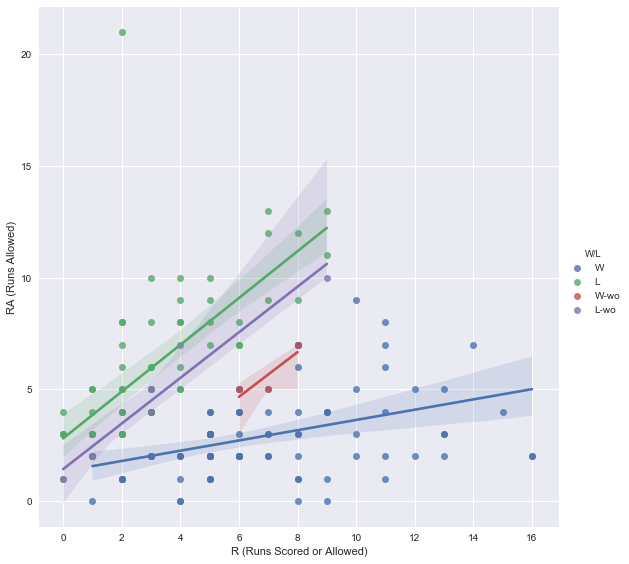

In [328]:
sns.set()
#set_style: By default the seaborn theme is darkgrid. 

# Plot games as a function of total runs across games
g = sns.lmplot(x="R", y="RA", hue="W/L",
               truncate=True, size=8, data=games)

# Use more informative axis labels than are provided by default
g.set_axis_labels("R (Runs Scored or Allowed)", "RA (Runs Allowed)")

## Output 2:
The output of the graph lmplot() shows data of Runs (scored or allowed) with the Runs Allowed.
The winning games are represented using blue and red while the losing games are represented using green and purple.
It is seen that when R>RA the games are won.

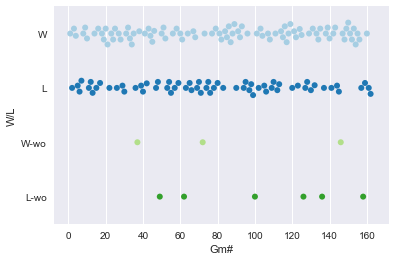

In [329]:
#The function call of swarmplot has following parameters:
#swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None,**kwargs)

# Drawing a categorical scatterplot to show each observation on Win-Loss for all the games
sns.swarmplot(x="Gm#", y="W/L", data=games,size=6,palette ='Paired')

#swamplot() function is similar to stripplot , but the points are adjusted so that they dont overlap.

## Output 3:
The above output of the graph using swarmplot is used to display seperate outcomes (Win-Loss) for each game.
This graph can be used to find the time period of games which were consecutively won or lost in summary.

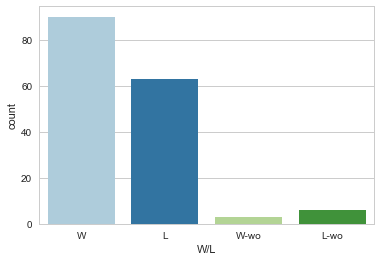

In [325]:
#This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences
#Hence, only x axis is passed in this function
sns.countplot(x='W/L',data=games,palette="Paired") 

## Output 4:
The above graph using countplot() helps to find the count of a data. Here it can be seen that the total wins of all games is more than 80 while the loses are approximately 60.

### References : 
https://seaborn.pydata.org/examples/index.html

https://rstudio-pubs-static.s3.amazonaws.com/281790_dad4c7e1d24942f2bf0eae3b51a1ae52.html